In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import pi

%matplotlib inline
%run "../notebooks/cargar_df.ipynb"

plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#Cargo el set de datos
train=get_train()

In [3]:
#Visualizo una porcion del mismo
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,27761,27760,27446,16808,16805,16802,16799,27455,24353,24355
Region,EMEA,EMEA,Americas,Americas,Americas,Americas,Americas,Americas,Japan,Japan
Territory,None,None,NW America,NW America,NW America,NW America,NW America,NW America,None,None
"Pricing, Delivery_Terms_Quote_Appr",1,0,0,1,1,1,1,1,1,1
"Pricing, Delivery_Terms_Approved",1,0,0,0,0,0,0,1,0,0
Bureaucratic_Code_0_Approval,1,0,0,1,1,1,1,1,0,0
Bureaucratic_Code_0_Approved,1,0,0,0,0,0,0,1,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5
Account_Created_Date,2015-06-16 00:00:00,2015-06-16 00:00:00,2015-04-21 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00,2015-04-21 00:00:00,2015-04-20 00:00:00,2015-04-20 00:00:00
Source,None,None,Source_7,Source_11,Source_11,Source_11,Source_11,Source_7,None,None


In [4]:
#Me quedo con las columnas necesarias para este analisis exploratorio
train1=train.loc[:,["Region","Month","Pricing, Delivery_Terms_Approved","Total_Amount_Currency", \
                    "Total_Amount","Total_Taxable_Amount","Stage","Product_Family","Product_Name"]]
train1

,Region,Month,"Pricing, Delivery_Terms_Approved",Total_Amount_Currency,Total_Amount,Total_Taxable_Amount,Stage,Product_Family,Product_Name
0,EMEA,2016-05-01,1,EUR,"5,272,800.00","5,272,800.00",Closed Lost,Product_Family_77,Product_Name_99
1,EMEA,2016-01-01,0,EUR,"48,230.00","48,230.00",Closed Won,Product_Family_77,Product_Name_100
2,Americas,2016-01-01,0,USD,"83,865.60","83,865.60",Closed Won,Product_Family_81,Product_Name_91
3,Americas,2018-02-01,0,USD,"7,421,881.50","7,421,881.50",Closed Lost,Product_Family_209,Product_Name_432
4,Americas,2018-02-01,0,USD,"13,357,192.50","13,357,192.50",Closed Lost,Product_Family_209,Product_Name_432
...,...,...,...,...,...,...,...,...,...
16942,EMEA,2016-03-01,1,EUR,"103,350.00","299,715.00",Closed Won,Product_Family_85,Product_Name_111
16943,EMEA,2016-04-01,1,EUR,"93,015.00","299,715.00",Closed Won,Product_Family_85,Product_Name_111
16944,EMEA,2016-03-01,1,EUR,"103,350.00","299,715.00",Closed Won,Product_Family_85,Product_Name_111
16945,Americas,2016-04-01,1,USD,"2,346,796.88",0.00,Closed Lost,Product_Family_158,Product_Name_287


In [5]:
#Visualizo la info de los tipos de datos en el set obtenido 
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Region                            16947 non-null  category      
 1   Month                             16947 non-null  datetime64[ns]
 2   Pricing, Delivery_Terms_Approved  16947 non-null  int16         
 3   Total_Amount_Currency             16947 non-null  category      
 4   Total_Amount                      16888 non-null  float64       
 5   Total_Taxable_Amount              16947 non-null  float64       
 6   Stage                             16947 non-null  object        
 7   Product_Family                    16947 non-null  category      
 8   Product_Name                      16947 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), int16(1), object(2)
memory usage: 773.6+ KB


In [6]:
#Convierto el formato para posterior utilizacion 
train1['Pricing, Delivery_Terms_Approved']=train1.loc[:,'Pricing, Delivery_Terms_Approved'].astype('str')
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Region                            16947 non-null  category      
 1   Month                             16947 non-null  datetime64[ns]
 2   Pricing, Delivery_Terms_Approved  16947 non-null  object        
 3   Total_Amount_Currency             16947 non-null  category      
 4   Total_Amount                      16888 non-null  float64       
 5   Total_Taxable_Amount              16947 non-null  float64       
 6   Stage                             16947 non-null  object        
 7   Product_Family                    16947 non-null  category      
 8   Product_Name                      16947 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), object(3)
memory usage: 872.9+ KB


In [7]:
#Analizo la columna Total Amount Currency la cual tiene los tipos de monedas que posee el set
train1.Total_Amount_Currency.value_counts().count()

5

In [8]:
#Veo cuales son
train1.Total_Amount_Currency.value_counts()

USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: Total_Amount_Currency, dtype: int64

In [9]:
#Aplico conversion de monedas vinculadas a la fecha segun el set de datos
# https://data.oecd.org/conversion/exchange-rates.htm
price_usd_convertion_by_year = {
    'EUR': {2016: 0.940, 2017: 0.923, 2018: 0.848, 2019: 0.893, 2020: 0.860},
    'JPY': {2016: 113.138, 2017: 116.667, 2018: 110.424, 2019: 109.008, 2020: 104.66},
    'AUD': {2016: 1.400, 2017: 1.358, 2018: 1.340, 2019: 1.439, 2020: 1.420},
    'GBP': {2016: 0.770, 2017: 0.808, 2018: 0.750, 2019: 0.784, 2020: 0.770},
    'USD': {2016: 1, 2017: 1, 2018: 1, 2019: 1, 2020: 1}
}

def get_convertion_usd(x):
    currency = x['Total_Amount_Currency']
    year = pd.to_datetime(x['Month']).year
    return price_usd_convertion_by_year[currency][year]
    
train1['Total_Amount_In_USD'] = train1['Total_Amount'] / train1.apply(lambda x: get_convertion_usd(x), axis=1)
train1['Total_Taxable_Amount_In_USD'] = train1['Total_Taxable_Amount'] / train1.apply(lambda x: get_convertion_usd(x), axis=1)

In [10]:
train1

,Region,Month,"Pricing, Delivery_Terms_Approved",Total_Amount_Currency,Total_Amount,Total_Taxable_Amount,Stage,Product_Family,Product_Name,Total_Amount_In_USD,Total_Taxable_Amount_In_USD
0,EMEA,2016-05-01,1,EUR,"5,272,800.00","5,272,800.00",Closed Lost,Product_Family_77,Product_Name_99,"5,609,361.70","5,609,361.70"
1,EMEA,2016-01-01,0,EUR,"48,230.00","48,230.00",Closed Won,Product_Family_77,Product_Name_100,"51,308.51","51,308.51"
2,Americas,2016-01-01,0,USD,"83,865.60","83,865.60",Closed Won,Product_Family_81,Product_Name_91,"83,865.60","83,865.60"
3,Americas,2018-02-01,0,USD,"7,421,881.50","7,421,881.50",Closed Lost,Product_Family_209,Product_Name_432,"7,421,881.50","7,421,881.50"
4,Americas,2018-02-01,0,USD,"13,357,192.50","13,357,192.50",Closed Lost,Product_Family_209,Product_Name_432,"13,357,192.50","13,357,192.50"
...,...,...,...,...,...,...,...,...,...,...,...
16942,EMEA,2016-03-01,1,EUR,"103,350.00","299,715.00",Closed Won,Product_Family_85,Product_Name_111,"109,946.81","318,845.74"
16943,EMEA,2016-04-01,1,EUR,"93,015.00","299,715.00",Closed Won,Product_Family_85,Product_Name_111,"98,952.13","318,845.74"
16944,EMEA,2016-03-01,1,EUR,"103,350.00","299,715.00",Closed Won,Product_Family_85,Product_Name_111,"109,946.81","318,845.74"
16945,Americas,2016-04-01,1,USD,"2,346,796.88",0.00,Closed Lost,Product_Family_158,Product_Name_287,"2,346,796.88",0.00


In [11]:
#Me quedo con solo las columna necesarias 'Region','Pricing, Delivery_Terms_Approved','Stage',
#'Total_Amount_In_USD','Total_Taxable_Amount_In_USD','Product_Family','Product_Name'
train2=train1.loc[:,['Region','Pricing, Delivery_Terms_Approved','Stage','Total_Amount_In_USD','Total_Taxable_Amount_In_USD', \
                    'Product_Family','Product_Name']]
train2

,Region,"Pricing, Delivery_Terms_Approved",Stage,Total_Amount_In_USD,Total_Taxable_Amount_In_USD,Product_Family,Product_Name
0,EMEA,1,Closed Lost,"5,609,361.70","5,609,361.70",Product_Family_77,Product_Name_99
1,EMEA,0,Closed Won,"51,308.51","51,308.51",Product_Family_77,Product_Name_100
2,Americas,0,Closed Won,"83,865.60","83,865.60",Product_Family_81,Product_Name_91
3,Americas,0,Closed Lost,"7,421,881.50","7,421,881.50",Product_Family_209,Product_Name_432
4,Americas,0,Closed Lost,"13,357,192.50","13,357,192.50",Product_Family_209,Product_Name_432
...,...,...,...,...,...,...,...
16942,EMEA,1,Closed Won,"109,946.81","318,845.74",Product_Family_85,Product_Name_111
16943,EMEA,1,Closed Won,"98,952.13","318,845.74",Product_Family_85,Product_Name_111
16944,EMEA,1,Closed Won,"109,946.81","318,845.74",Product_Family_85,Product_Name_111
16945,Americas,1,Closed Lost,"2,346,796.88",0.00,Product_Family_158,Product_Name_287


In [12]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Region                            16947 non-null  category
 1   Pricing, Delivery_Terms_Approved  16947 non-null  object  
 2   Stage                             16947 non-null  object  
 3   Total_Amount_In_USD               16888 non-null  float64 
 4   Total_Taxable_Amount_In_USD       16947 non-null  float64 
 5   Product_Family                    16947 non-null  category
 6   Product_Name                      16947 non-null  object  
dtypes: category(2), float64(2), object(3)
memory usage: 723.7+ KB


In [13]:
#Calculo la diferencia entre el total taxable amount y el total amount
train2['Dif_Taxable_Vs_Total']=abs(train2['Total_Taxable_Amount_In_USD']-train2['Total_Amount_In_USD'])
train2

,Region,"Pricing, Delivery_Terms_Approved",Stage,Total_Amount_In_USD,Total_Taxable_Amount_In_USD,Product_Family,Product_Name,Dif_Taxable_Vs_Total
0,EMEA,1,Closed Lost,"5,609,361.70","5,609,361.70",Product_Family_77,Product_Name_99,0.00
1,EMEA,0,Closed Won,"51,308.51","51,308.51",Product_Family_77,Product_Name_100,0.00
2,Americas,0,Closed Won,"83,865.60","83,865.60",Product_Family_81,Product_Name_91,0.00
3,Americas,0,Closed Lost,"7,421,881.50","7,421,881.50",Product_Family_209,Product_Name_432,0.00
4,Americas,0,Closed Lost,"13,357,192.50","13,357,192.50",Product_Family_209,Product_Name_432,0.00
...,...,...,...,...,...,...,...,...
16942,EMEA,1,Closed Won,"109,946.81","318,845.74",Product_Family_85,Product_Name_111,"208,898.94"
16943,EMEA,1,Closed Won,"98,952.13","318,845.74",Product_Family_85,Product_Name_111,"219,893.62"
16944,EMEA,1,Closed Won,"109,946.81","318,845.74",Product_Family_85,Product_Name_111,"208,898.94"
16945,Americas,1,Closed Lost,"2,346,796.88",0.00,Product_Family_158,Product_Name_287,"2,346,796.88"


In [14]:
#Filtro para los stage de tipo Won
train3=train2[train2['Stage']=='Closed Won']
train3

,Region,"Pricing, Delivery_Terms_Approved",Stage,Total_Amount_In_USD,Total_Taxable_Amount_In_USD,Product_Family,Product_Name,Dif_Taxable_Vs_Total
1,EMEA,0,Closed Won,"51,308.51","51,308.51",Product_Family_77,Product_Name_100,0.00
2,Americas,0,Closed Won,"83,865.60","83,865.60",Product_Family_81,Product_Name_91,0.00
7,Americas,1,Closed Won,"50,688.00","50,688.00",Product_Family_143,Product_Name_251,0.00
23,APAC,1,Closed Won,"1,621,851.00","1,621,851.00",Product_Family_73,Product_Name_84,0.00
63,EMEA,0,Closed Won,"109,946.81","109,946.81",Product_Family_77,Product_Name_100,0.00
...,...,...,...,...,...,...,...,...
16937,EMEA,0,Closed Won,"439,787.23","562,679.52",Product_Family_77,Product_Name_96,"122,892.29"
16939,EMEA,1,Closed Won,"427,340.43","427,340.43",Product_Family_77,Product_Name_96,0.00
16942,EMEA,1,Closed Won,"109,946.81","318,845.74",Product_Family_85,Product_Name_111,"208,898.94"
16943,EMEA,1,Closed Won,"98,952.13","318,845.74",Product_Family_85,Product_Name_111,"219,893.62"


In [15]:
#Agrupo por region y diferencia entre total taxable amount y total amount contando los tipos de cantidades
#en cuanto a monto de diferencia
train3=train2.groupby(['Region','Dif_Taxable_Vs_Total']).agg({'Dif_Taxable_Vs_Total':'count'})
train3b=train3.rename(columns={'Dif_Taxable_Vs_Total':'Cantidades_Totales'})
train3b=train3b.sort_values("Cantidades_Totales", ascending=False).head(10)
train3b

Cantidades_Totales
Region      Dif_Taxable_Vs_Total                    
EMEA                0.00                        2338
APAC                0.00                        1622
Americas            0.00                        1193
Japan               0.00                        1100
Middle East         0.00                         126
APAC        1,236,688.43                          48
Americas          750.00                          37
              243,600.00                          36
APAC          328,440.00                          24
              329,910.00                          24

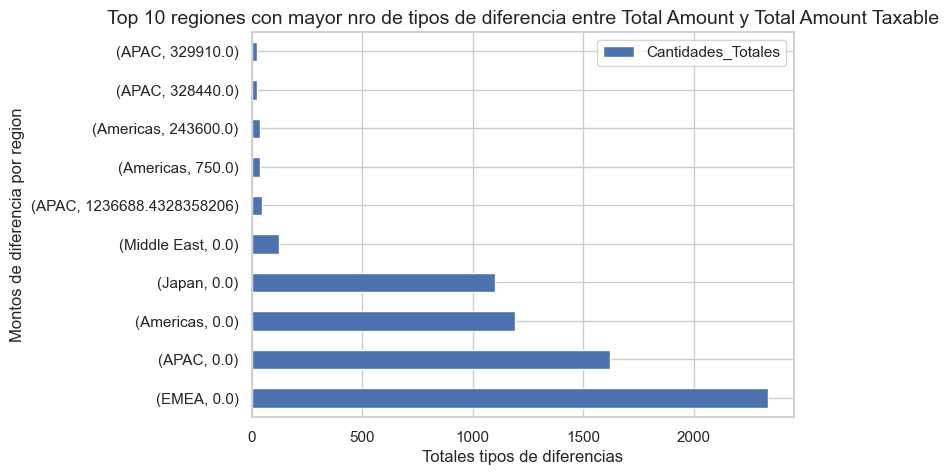

In [16]:
#Grafico el resultado anterior
plot3=train3b.plot(kind='barh', figsize=(7,5));
plot3.set_title('Top 10 regiones con mayor nro de tipos de diferencia entre Total Amount y Total Amount Taxable', fontsize=14);
plot3.set_xlabel('Totales tipos de diferencias', fontsize=12);
plot3.set_ylabel('Montos de diferencia por region', fontsize=12);

In [17]:
#Me quedo con Region ,Pricing, Delivery_Terms_Approved y Stage
train4=train2.loc[:,['Region','Pricing, Delivery_Terms_Approved','Stage']]
train4

,Region,"Pricing, Delivery_Terms_Approved",Stage
0,EMEA,1,Closed Lost
1,EMEA,0,Closed Won
2,Americas,0,Closed Won
3,Americas,0,Closed Lost
4,Americas,0,Closed Lost
...,...,...,...
16942,EMEA,1,Closed Won
16943,EMEA,1,Closed Won
16944,EMEA,1,Closed Won
16945,Americas,1,Closed Lost


In [18]:
#Agrupo ahora por Region y Stage, contabilizando Pricing, Delivery_Terms_Approved
#para analizar en cuales regiones se requirio de aprobacion especial y que cantidad de aprobaciones
train4b=train4.groupby(['Region','Stage']).agg({'Pricing, Delivery_Terms_Approved':'value_counts'})
train5=train4b.rename(columns={'Pricing, Delivery_Terms_Approved':'Totales'})
train5

Totales
Region      Stage         Pricing, Delivery_Terms_Approved         
APAC        Closed Lost   0                                     737
                          1                                     618
            Closed Won    1                                    1036
                          0                                     860
            Proposal      1                                       6
                          0                                       2
            Qualification 0                                       3
Americas    Closed Lost   1                                    1153
                          0                                     987
            Closed Won    0                                     920
                          1                                     873
            Negotiation   1                                       8
            Proposal      1                                       4
EMEA        Closed Lost   1                                    1337
                          0                                     852
            Closed Won    1                                    1356
                          0                                    1115
            Negotiation   1                                       1
            Proposal      1                                       3
Japan       Closed Lost   0                                    1310
                          1                                     236
            Closed Won    1                                    3097
                          0                                     226
            Negotiation   0                                       1
            Proposal      0                                       7
                          1                                       7
            Qualification 0                                       8
Middle East Closed Lost   1                                      99
                          0                                      21
            Closed Won    1                                      42
                          0                                       8
            Negotiation   1                                       8
            Proposal      1                                       6

In [19]:
train5b=train5.unstack(fill_value=0)
train5b

Totales      
Pricing, Delivery_Terms_Approved       0     1
Region      Stage                             
APAC        Closed Lost              737   618
            Closed Won               860  1036
            Proposal                   2     6
            Qualification              3     0
Americas    Closed Lost              987  1153
            Closed Won               920   873
            Negotiation                0     8
            Proposal                   0     4
EMEA        Closed Lost              852  1337
            Closed Won              1115  1356
            Negotiation                0     1
            Proposal                   0     3
Japan       Closed Lost             1310   236
            Closed Won               226  3097
            Negotiation                1     0
            Proposal                   7     7
            Qualification              8     0
Middle East Closed Lost               21    99
            Closed Won                 8    42
            Negotiation                0     8
            Proposal                   0     6

In [20]:
level0 = train5b.columns.get_level_values(0)
#level1 = train5b.columns.get_level_values(1)
level1 = ['sin_aprobacion','con_aprobacion']
train5b.columns = level0 + "_" + level1
train5b

Totales_sin_aprobacion  Totales_con_aprobacion
Region      Stage                                                        
APAC        Closed Lost                       737                     618
            Closed Won                        860                    1036
            Proposal                            2                       6
            Qualification                       3                       0
Americas    Closed Lost                       987                    1153
            Closed Won                        920                     873
            Negotiation                         0                       8
            Proposal                            0                       4
EMEA        Closed Lost                       852                    1337
            Closed Won                       1115                    1356
            Negotiation                         0                       1
            Proposal                            0                       3
Japan       Closed Lost                      1310                     236
            Closed Won                        226                    3097
            Negotiation                         1                       0
            Proposal                            7                       7
            Qualification                       8                       0
Middle East Closed Lost                        21                      99
            Closed Won                          8                      42
            Negotiation                         0                       8
            Proposal                            0                       6

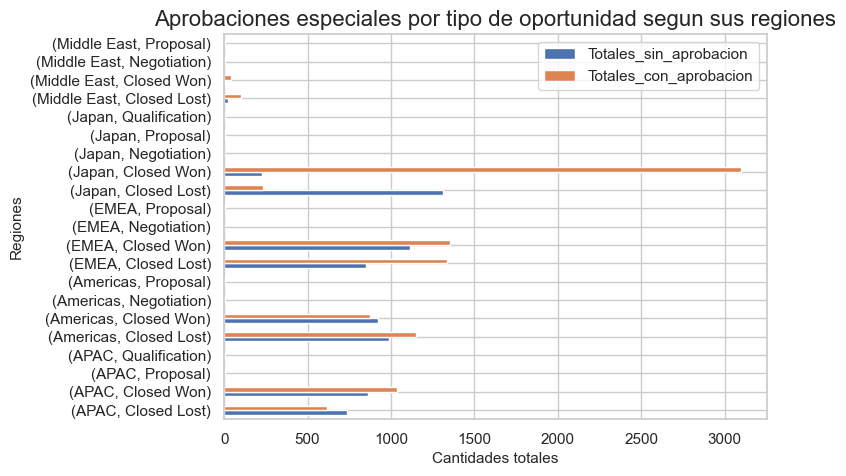

In [21]:
#Grafico el resultado anterior
plot=train5b.plot(kind='barh', figsize=(7,5))
plot.set_title('Aprobaciones especiales por tipo de oportunidad segun sus regiones', fontsize=16);
plot.set_xlabel('Cantidades totales', fontsize=11);
plot.set_ylabel('Regiones', fontsize=11);